In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, make_scorer, fbeta_score
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
datasets.load_*?

# Loading Dataset

In [3]:
iris = datasets.load_iris()

In [4]:
X = pd.DataFrame(iris.data, columns =iris.feature_names)
y= pd.DataFrame(iris.target, columns =['flower'])

In [5]:
df = pd.concat([X, y], axis=1)

In [6]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [7]:
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Data Viz

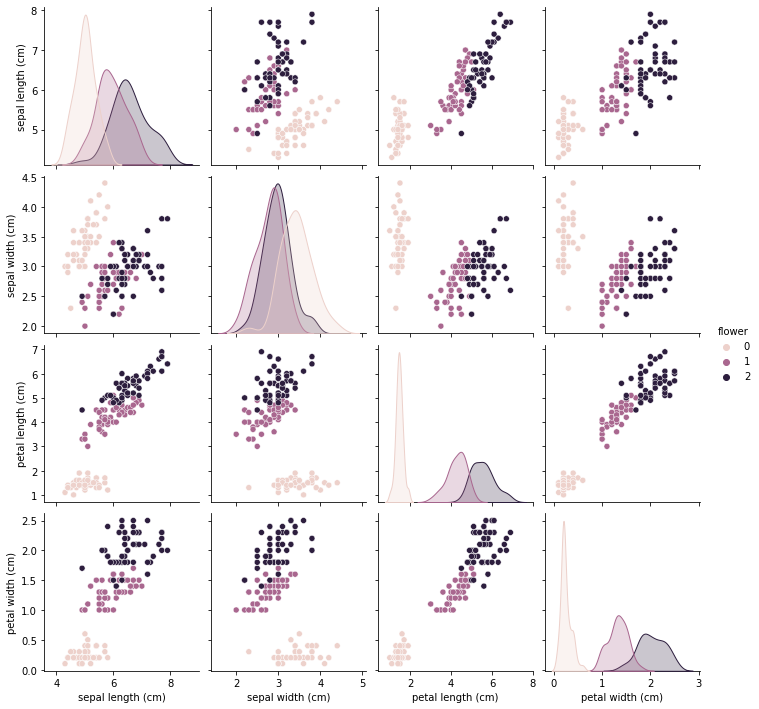

In [8]:
sns.pairplot(df, hue='flower')

# Deductions from the Data Viz

Deductions on this pairplot shows:
1) A balanced dataset of fairly the same amount of flower types. This can be seen in the barchart of flower against flower

2) The petal width & Sepal length, petal length of the flowers shows an increase in flower length from type 0 to type 

3) The sepal width shows a different pattern with flower 0 generally the highest, flower 2 the second and flower 1 the lowest

# Train Test Split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Declaring Models

In [10]:
svc_clf = SVC()
dtree = DecisionTreeClassifier()
GNB = GaussianNB()
SGD = SGDClassifier() 
LR = LogisticRegression()
KNb = KNeighborsClassifier()

In [11]:
dtree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [12]:
svcparams = {'degree':[1,2,3, 10], 'C':[1,10] }
dtreeparams = {'max_depth':[1,2,3] }
SGDparams = {'l1_ratio':[0.1,0.15,0.2,0.5] }
LRparams = {'l1_ratio':[0.1,0.15,0.2,0.5, 0.6,0.7, 0.8, 1] }
KNbparams = {'n_neighbors':[1,2,3,4,5] }

# Grid Search CV & Model Evaluation

In [13]:
f1_score = make_scorer(fbeta_score, beta=1, average='micro')
#root_mean_square = make_scorer(np.sqrt(mean_squared_error))

In [14]:
def Grid_Search(model, paramaters, X, y):
    model = GridSearchCV(estimator=model, 
                 param_grid=paramaters, 
                 cv=3,
                scoring=f1_score
                )
    
    return model.fit(X, y)
    

In [15]:
svcmodel = Grid_Search(svc_clf,svcparams, X_train, y_train)
dtreemodel = Grid_Search(dtree,dtreeparams, X_train, y_train)
#GNBmodel = Grid_Search(GNB,dtreeparams, X_train, y_train)
SGDmodel = Grid_Search(SGD,SGDparams, X_train, y_train)
LRmodel = Grid_Search(LR,LRparams, X_train, y_train)
KNbmodel = Grid_Search(KNb,KNbparams, X_train, y_train)

/Users/yao/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yao/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yao/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yao/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [16]:
pd.DataFrame(svcmodel.cv_results_)['mean_test_score'].max()

0.9729729729729729

In [17]:
pd.DataFrame(dtreemodel.cv_results_)['mean_test_score'].max()

0.9193930772878142

In [18]:
pd.DataFrame(SGDmodel.cv_results_)['mean_test_score'].max()

0.8568041725936463

In [19]:
pd.DataFrame(LRmodel.cv_results_)['mean_test_score'].max()

0.9461830251303937

In [20]:
pd.DataFrame(KNbmodel.cv_results_)['mean_test_score'].max()

0.9551920341394027

In [21]:
y_pred = svcmodel.predict(X_test)

SVC was found to be the best performing model as such the model is selected for the test set 

# Test Set  Prediction & Evaluation

In [23]:
fbeta_score(y_test, y_pred, average='micro', beta=0.5)

1.0

SVC performs perfect on test set